# Unit 1 - Modelling and Representations of Systems
# Part 2 - Laplace Transforms, Transfer Functions and S-Plane Plots

- Modelling of electrical and mechanical systems
    - Electric circuits with resistors, capacitors, inductors, op-amps
    - Translational mechanical systems
    - Rotational mechanical systems
- Simulation of a system
    - Response due to initial conditions
    - Step response
    - Response to any input
- Representations
    - Differential equation
    - Transfer function
- Characteristics of a system
    - Settling Time
    - Maximum overshoot
    - Rise time
    - Stability
- Key Concepts
    - Poles
    - Zeros
- Plots
    - Time domain response
    - S-Plane

Required Viewing before this lecture:
- video series on transient response

Chapters in the textbook: Chapter 5

# From previous part:

Solving differential equations in time domain is tedious, however, we could do it. 

On the other hand over time people have come up with helpful tools that either:
- simplify the task of solving differential equations (for example: Laplace)
- give extra insight (for example: Fourier)
- or both! 

Key insight from transfer function representation:
- poles/zeros of a system

# Consider same example as last part

![1 Disk Graphic Diagram](1diskSimpleGraphic.png "1 Disk Graphic Diagram")
​
A torque is applied to a thin flexible rod. A disk is attached to the rod. The rod is supported by bearings on the left side of the disk. The angular position of the rod at both ends is measured. 
​
We will:
- Derive the transfer function between angular position of the rod at the left side ($\theta_1$) and angular position of the rod at the right side ($\theta_2$),
- Analyze pole-zero map, 
- Analyze step response of system,
- See how to simulate the output of the system for any input using Python.
​
# Schematic Diagram 
![1 Disk Schematic Diagram](1diskSimpleSchematic.png "1 Disk Schematic Diagram")

# Free Body Diagram
![1 Disk Free Body Diagram](1diskSimpleFreeBody.png "1 Disk Free Body Diagram")

Governing differential equation that we derived in previous part:
$$
\begin{align*}
k \theta_1 = J \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b \frac{\text{d} \theta_2}{\text{dt}} + k \theta_2
\end{align*}
$$

Recall the following properties of the Laplace transform:
$$
\begin{align*}
\mathcal{L}[f'(t)] &= sF(s) - f(0) \\
\mathcal{L}[f''(t)] &= s^2F(s) -sf(0) - f(0)'
\end{align*}
$$
        
# In Class Activity!

Using these properties, take the Laplace transform the governing differential equation that we derived earlier:
$$
\begin{align*}
\mathcal{L}[ k \theta_1 ] = \mathcal{L}[ J \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b \frac{\text{d} \theta_2}{\text{dt}} + k \theta_2]
\end{align*}
$$

Gather $\Theta_1(s)$ and $\Theta_2(s)$ terms.

Take Laplace transform of both sides:
$$
\begin{align*}
\mathcal{L}[k \theta_1(t)] &= \mathcal{L}\Big[ J \frac{\text{d}^2 \theta_2(t)}{\text{dt}^2} + b \frac{\text{d} \theta_2(t)}{\text{dt}} + k \theta_2(t) \Big] \\
k \Theta_1(s) &= J s^2 \Theta_2(s) + b s \Theta_2(s) + k \Theta_2(s) - J s \theta_2(0) -J \theta_2'(0) - k \theta_2(0)
\end{align*}
$$
Gather terms and find expression for $\Theta_2(s)$:
$$
\begin{align*}
\Theta_2(s) = \underbrace{\frac{k}{Js^2 + bs+k}}_{\text{Transfer Function}}\Theta_1(s) + \underbrace{\frac{Js\theta_2(0) + J \theta_2'(0) + k \theta_2(0)}{Js^2 + bs+k}}_{\text{Response due to initial conditions}}
\end{align*}
$$

# Poles and Zeros of a Transfer Function

Can factor numerator and denominator of transfer function:

$$
\begin{align*}
G(s) &= \frac{b_0 s^n + b_1 s^{n-1} + \cdots + b_{n-1} s + b_{n}}{s^n + a_1s^{n-1} + \cdots + a_{n-1} s + a_{n}} \\
&= \frac{ b_0( s + z_1 )(s + z_2) + \cdots + (s+z_n) }{(s+p_1)(s+p_2) \cdots (s+p_n)}
\end{align*}
$$

where 
- $z_1$, $\ldots$, $z_n$ are the zeros of the transfer function and,
- $p_1$, $\dots,$, $p_n$ are the poles of the transfer function.


# What do the poles mean? What do they represent?

To me it is not very informative to simply say "poles are the points in the s-plane where the transfer function blows up to $\infty$"... There should be a deeper or more tangible meaning.

In order to discover this meaning, let's take the partial fraction expansion of $G(s)$:

$$
\begin{align*}
G(s) = \sum_{k=1}^n \frac{c_k}{s+p_k},
\end{align*}
$$

Take the inverse Laplace transform:
$$
\begin{align*}
g(t) &= \sum_{k=1}^n c_k e^{-p_kt} \\
\end{align*}
$$

What do you notice? When we solved the system in time-domain directly, the general solution of the differential equation was always of the form 
$$
\begin{align*}
g(t) &= \sum_{k=1}^n c_k e^{-p_kt} \\
\end{align*}
$$
which is exactly the same as above. Recall that to construct the general solution, we selected $p_k$ based on the characteristic equation of the differential equation. 

So now we can say that the poles of the system are the exact same as the solutions to the characteristic equation of the differential equation! That is an interesting connection!

We will see in the remainder of this lecture that the poles determine many characteristics of a system. 



In this lecture we will learn about 2 types of plots that illustrate various characteristics about a system:
    - Step Response plot
    - S-plane plot

# First Type of Plot: Step Response

Let the input, in this case $\theta_1(t)$, be a step. 

Step function defined as:
$$
\begin{align*}
1(t) = \begin{cases}
0 & \text{if $t\le0$}, \\
1 & \text{if $t>0$}.
\end{cases}
\end{align*}
$$

What is the Laplace transform of a step? 


$$
\begin{align*}
\mathcal{L}[1(t)] = \frac{1}{s}
\end{align*}
$$

# In Class Activity!

- Read and understand the following code. 
- Modify the parameters of the system and compare the step response. 
    - What happens when you increase the spring constant? 
    - What happens when you increase the inertia?
    - What happens when you increase the damping?


In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math

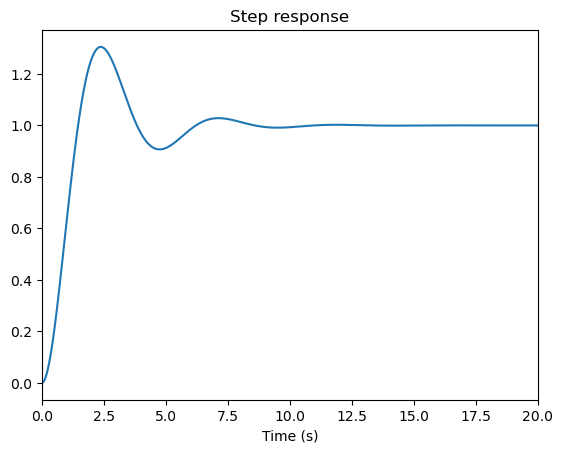

In [2]:
def eval_poly(poly, k):
    n = poly.shape[0] - 1

    p_at_k = 0
    for ii in range(n+1):
        p_at_k += poly[ii]*k**(n-ii)
    
    return p_at_k


def enel441_partial_fraction_expansion(num, den):
    ## returns partial fraction expansion. This function cannot deal with repeated poles. It will fail in that case.

    poles = np.roots(den)
    num_poles = poles.shape[0]
    coeff = np.zeros(num_poles, dtype=np.csingle)

    for ii in range(num_poles):
        nn = eval_poly(num, poles[ii])
        dd = 1
        for jj in range(num_poles):
            if ii != jj:
                dd *= (poles[ii] - poles[jj])
        
        coeff[ii] = nn/dd
    return poles, coeff
            
            
def enel441_step_response(num, den, t):
    poles, coefficients = enel441_partial_fraction_expansion(num, den)

    # Plot the step reponse (assume initial conditions are zero)
    N = t.shape[0]
    out_step = np.zeros(N, dtype=np.csingle)
    for ii in range(poles.shape[0]):
        out_step += coefficients[ii]*np.exp(poles[ii]*t)
    
    fig, ax = plt.subplots(1,1)
    ax.plot(t,out_step.real, label='Step Response')
    ax.set_title(r'Step response')
    ax.set_xlabel('Time (s)')

    plt.xlim(t[0], t[-1])
    return fig, ax, np.real(out_step)



# set system parameters
J = 1 
k = 2
b = 1

# construct arrays to define numerator and denominator. Use powers of s: a_3s^3 + a_2s^2 + a_1s + a_0 
# corresponds to array: [a_3, a_2, a_1, a_0]
num = np.array([k])
den = np.array([J, b, k, 0]) # Note the extra 0! Why is it there?

# generate the data
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

fig, ax, theta_2 = enel441_step_response(num, den, t)

# Characteristics of a step response (Transient Response)

![Step Response Characteristics](step-response.png "Step Response Characteristics")

# In Class Activity!
- add a function that calculates and plots the rise time
- add a function that calculates and plot the maximum overshoot
- add a function that draws (approximate) bounds on the settling time
- add a function that calculates the settling time

Rise Time = 0.24802480248024805s
Peak Time = 0.7060706070607061s
Peak Overshoot = 70.23053169250488%
Settling Time = 7.8267826782678265s


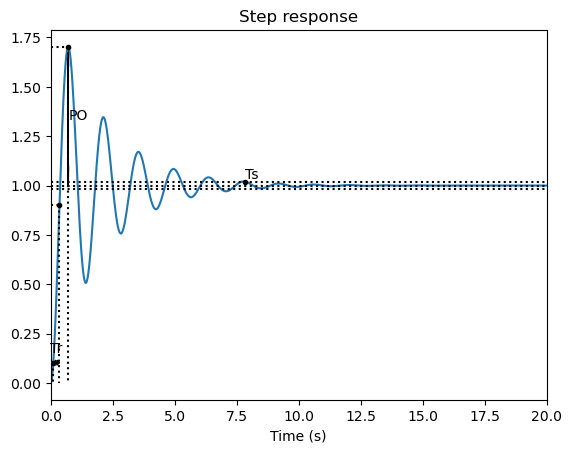

In [4]:
import numpy as np

# set system parameters
J = 1 
k = 20
b = 1

# construct arrays to define numerator and denominator. Use powers of s: a_3s^3 + a_2s^2 + a_1s + a_0 
# corresponds to array: [a_3, a_2, a_1, a_0]
num = np.array([k])
den = np.array([J, b, k, 0])

# generate the data
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

fig, ax, theta_2 = enel441_step_response(num, den, t)

def calc_rise_time(t, out_step, ax):
    final_value = out_step[-1]
    
    # add your code here to calculate the following variables
    final_value = out_step[-1]
    
    ii = 0
    while out_step[ii] < final_value*0.1:
        ii += 1
    
    start_index = ii
    
    while out_step[ii] < final_value*0.9:
        ii += 1
        
    end_index = ii
    
    rise_time = t[end_index] - t[start_index]
    
    ax.plot(t[start_index], out_step[start_index], 'k.')
    ax.plot(t[end_index], out_step[end_index], 'k.')
    
    # uncomment to add annotations (when your function is ready)
    ax.plot([t[0], t[start_index]], [out_step[start_index], out_step[start_index]], 'k:')
    ax.plot([t[start_index], t[start_index]], [out_step[start_index], 0], 'k:')
    ax.plot([t[0], t[end_index]], [out_step[end_index], out_step[end_index]], 'k:')
    ax.plot([t[end_index], t[end_index]], [out_step[end_index], 0], 'k:')
    
    ax.arrow(t[start_index], out_step[start_index], rise_time, 0, head_length = 0.1, head_width = 0.025, length_includes_head = True )
    ax.arrow(t[end_index], out_step[start_index], -rise_time, 0, head_length = 0.1, head_width = 0.025, length_includes_head = True )
    
    ax.text(t[start_index] + rise_time/2, out_step[start_index] + 0.05, 'Tr', horizontalalignment='center')
    return rise_time


def calc_peak_overshoot(t, out_step, ax):
    final_value = out_step[-1]
    
    # add your code here to calculate the following variables
    index_peak_overshoot = np.argmax(out_step)
    peak_overshoot = out_step[index_peak_overshoot]
    peak_overshoot_percent = (peak_overshoot-final_value)/final_value*100
        
    ax.plot(t[index_peak_overshoot], peak_overshoot, 'k.')
    
    #uncomment to add annotations (when your function is ready)
    ax.plot([t[0], t[-1]], [final_value, final_value], 'k:')
    ax.plot([t[0], t[index_peak_overshoot]], [peak_overshoot, peak_overshoot], 'k:')
    ax.plot([t[index_peak_overshoot], t[index_peak_overshoot]], [peak_overshoot, 0], 'k:')
    
    ax.arrow(t[index_peak_overshoot], final_value, 0, peak_overshoot-final_value, head_length = 0.1, head_width = 0.025, length_includes_head = True )
    ax.arrow(t[index_peak_overshoot], peak_overshoot, 0, -peak_overshoot+final_value, head_length = 0.1, head_width = 0.025, length_includes_head = True )
    
    ax.text(t[index_peak_overshoot], final_value + (peak_overshoot-final_value)/2, 'PO', verticalalignment='center')
    
    return t[index_peak_overshoot], peak_overshoot_percent



def calc_settling_time(t, out_step, ax):
    final_value = out_step[-1]
    
    # add your code here to calculate the following variables
    ii = t.shape[0] - 1
    while out_step[ii] < 1.02*final_value and out_step[ii] > 0.98*final_value:
        ii -= 1
    
    index_settling_time = ii   
    
    
    ax.plot(t[index_settling_time], out_step[index_settling_time], 'k.')
    
    #uncomment to add annotations (when your function is ready)
    ax.plot([t[0], t[-1]], [0.98*final_value, 0.98*final_value], 'k:')
    ax.plot([t[0], t[-1]], [1.02*final_value, 1.02*final_value], 'k:')
    if out_step[index_settling_time] > final_value:
        ax.text(t[index_settling_time], out_step[index_settling_time], 'Ts', verticalalignment='bottom')
    else:
        ax.text(t[index_settling_time], out_step[index_settling_time], 'Ts', verticalalignment='top')
    
    return t[index_settling_time]



rise_time = calc_rise_time(t, theta_2, ax)
peak_time, peak_overshoot = calc_peak_overshoot(t, theta_2, ax)
settling_time = calc_settling_time(t, theta_2, ax)

print('Rise Time = ', rise_time, 's', sep='' )
print('Peak Time = ', peak_time, 's', sep='' )
print('Peak Overshoot = ', peak_overshoot, '%', sep='' )
print('Settling Time = ', settling_time, 's', sep='' )

# Second Type of Plot we will use: S-Plane Plot

We have determined that the poles are very important. So we want to have a plot to visualize the poles and zeros and be able to infer some of the effects of the pole locations. 

Recall poles/zeros can be real or imaginary. 

Idea: create a plot with
- real parts of the poles/zeros along x-axis
- imaginary parts of the poles/zeros along y-axis


In [5]:
def enel441_s_plane_plot(num_sys, den_sys, fig=[], ax=[]):
    if not fig: 
        fig, ax = plt.subplots(1,1)
    
    poles_sys = np.roots(den_sys)
    for pp in poles_sys:
        ax.plot(np.real(pp), np.imag(pp), 'bx' )

    zeros_sys = np.roots(num_sys)
    for zz in zeros_sys:
        ax.plot(np.real(zz), np.imag(zz), 'ro')

    plt.xlim(np.min(np.real(poles_sys))-0.5, np.max(np.real(poles_sys))+0.5)
    x_left, x_right = plt.xlim()

    if x_right < 0.5:
        x_right = 0.5

    if x_left > -0.5:
        x_left = -0.5

    plt.xlim(x_left, x_right)
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()
    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()
    ax.set_title('S-Plane Plot')
    ax.set_xlabel('Real[s]')
    ax.set_ylabel('Imag[s]')

    ax.xaxis.set_label_coords(0.5,-0.01)
    ax.yaxis.set_label_coords(-0.01,0.5)
    return fig, ax



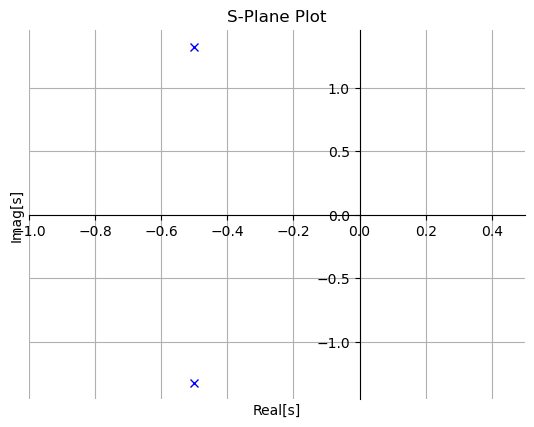

In [6]:
# s-plane plot
k = 2
den_sys = np.array([J, b, k])
num_sys = np.array([k])
fig, ax = enel441_s_plane_plot(num_sys,den_sys)

# In Class Activity!

# Visualizing characteristics odf the step Response on the S-Plane Plot

Select a set of systems, with poles along a vertical line in the s-plane. Make sure you pick a vertical line that ends up with stable systems. Plot the step-responses of each system on the same plot. What do you notice about the step responses? 

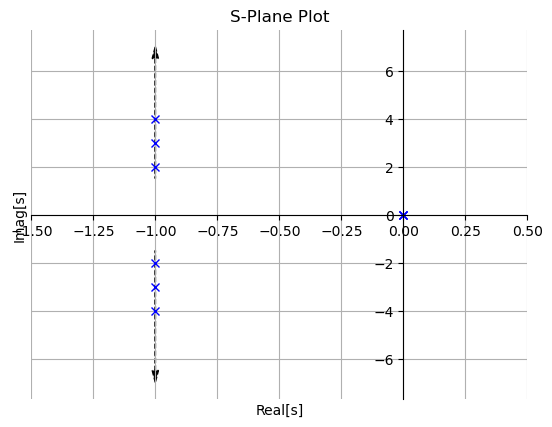

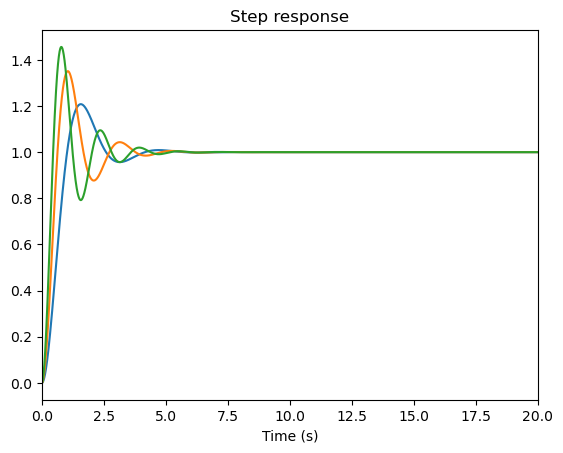

In [7]:
import enel441_utilities as eu
import numpy as np
import importlib

importlib.reload(eu)

def roots_to_polynomial(roots_poly):
    poly = np.array([1])
    for rr in roots_poly:
        poly = np.convolve(poly, np.array([1, -rr]))
    return np.real(poly)


# pick three polynomials with roots on the same vertical line
p1 = -1+2j   # choose p1 with smallest imaginary part
p2 = -1+3j
p3 = -1+4j   # choose p3 with largest imaginary part.
roots1 = np.array([p1, np.conjugate(p1), 0]) 
roots2 = np.array([p2, np.conjugate(p2), 0])
roots3 = np.array([p3, np.conjugate(p3), 0])
den1 = eu.roots_to_polynomial(roots1)
den2 = eu.roots_to_polynomial(roots2)
den3 = eu.roots_to_polynomial(roots3)
num1 = np.array([abs(p1)**2])   # normalize the response to a unit step. Can we explain why this works?
num2 = np.array([abs(p2)**2])
num3 = np.array([abs(p3)**2])

fig, ax = eu.enel441_s_plane_plot(num1,den1)
fig, ax = eu.enel441_s_plane_plot(num2,den2, fig, ax)
fig, ax = eu.enel441_s_plane_plot(num3,den3, fig, ax)
ax.arrow(np.real(p1), np.imag(p1)-0.5, 0, np.imag(p3)+1, linestyle='--',head_width=0.025, head_length=0.5, fc='k')
ax.arrow(np.real(p1), -np.imag(p1)+0.5, 0, -np.imag(p3)-1, linestyle='--',head_width=0.025, head_length=0.5, fc='k')

# calculate step responses
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

fig, ax, out_step = eu.enel441_step_response(num1,den1,t)
fig, ax, out_step = eu.enel441_step_response(num2,den2,t, fig, ax)
fig, ax, out_step = eu.enel441_step_response(num3,den3,t, fig, ax)

# What do we see? 

# What characteristic of the step response stays the same? 

# Does this match the equations derived during the videos?

Now, select a set of systems with poles along a horizontal line in the s-plane. Make sure you pick a line that ends up with stable systems. Plot the step-responses of each system on the same plot. What do you notice about the step responses? 

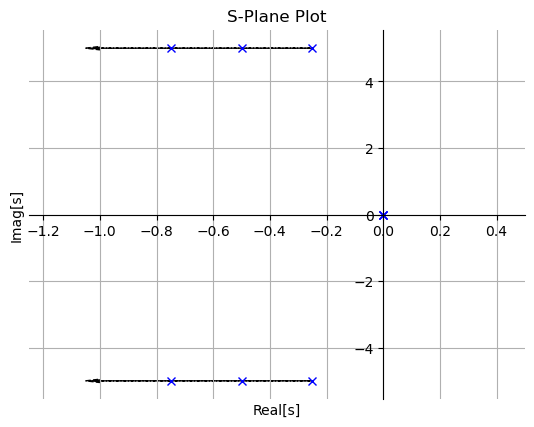

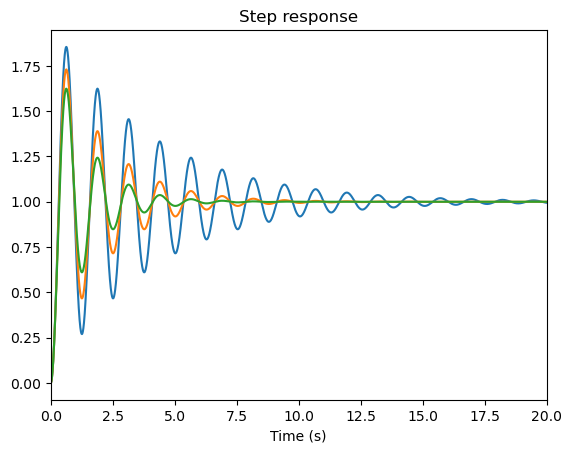

In [8]:
# pick three polynomials with roots on the same vertical line
p1 = -0.25+5j # choose p1 with least negaitve real part
p2 = -0.5+5j
p3 = -0.75+5j # choose p3 with most negative real part
roots1 = np.array([p1, np.conjugate(p1), 0])
roots2 = np.array([p2, np.conjugate(p2), 0])
roots3 = np.array([p3, np.conjugate(p3), 0])
den1 = eu.roots_to_polynomial(roots1)
den2 = eu.roots_to_polynomial(roots2)
den3 = eu.roots_to_polynomial(roots3)
num1 = np.array([abs(p1)**2])
num2 = np.array([abs(p2)**2])
num3 = np.array([abs(p3)**2])

fig, ax = eu.enel441_s_plane_plot(num1,den1)
fig, ax = eu.enel441_s_plane_plot(num2,den2, fig, ax)
fig, ax = eu.enel441_s_plane_plot(num3,den3, fig, ax)
ax.arrow(np.real(p1), np.imag(p1), np.real(p3), 0, linestyle='--',head_width=0.1, head_length=0.05, fc='k')
ax.arrow(np.real(p1), -np.imag(p1), np.real(p3), 0, linestyle='--',head_width=0.1, head_length=0.05, fc='k')

# calculate step responses
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

fig, ax, out_step = eu.enel441_step_response(num1,den1,t)
fig, ax, out_step = eu.enel441_step_response(num2,den2,t, fig, ax)
fig, ax, out_step = eu.enel441_step_response(num3,den3,t, fig, ax)

# What do we observe? 

# What characteristic of the step reponse stays the same?

# Does this match what we learned in the video?

In [ ]:
# pick three polynomials with roots on the same diagonal line
p1 = -1+1j # pole closest to the origin
p2 = -2+2j
p3 = -3+3j # pole furthest from the origin
roots1 = np.array([p1, np.conjugate(p1), 0])
roots2 = np.array([p2, np.conjugate(p2), 0])
roots3 = np.array([p3, np.conjugate(p3), 0])
den1 = eu.roots_to_polynomial(roots1)
den2 = eu.roots_to_polynomial(roots2)
den3 = eu.roots_to_polynomial(roots3)
num1 = np.array([abs(p1)**2])
num2 = np.array([abs(p2)**2])
num3 = np.array([abs(p3)**2])


fig, ax = eu.enel441_s_plane_plot(num1,den1)
fig, ax = eu.enel441_s_plane_plot(num2,den2, fig, ax)
fig, ax = eu.enel441_s_plane_plot(num3,den3, fig, ax)
ax.arrow(-0.25, 0.25, -3, 3, linestyle='--',head_width=0.1, head_length=0.1, fc='k')
ax.arrow(-0.25, -0.25, -3, -3, linestyle='--',head_width=0.1, head_length=0.1, fc='k')

# calculate step responses
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

fig, ax, out_step = eu.enel441_step_response(num1,den1,t)
fig, ax, out_step = eu.enel441_step_response(num2,den2,t, fig, ax)
fig, ax, out_step = eu.enel441_step_response(num3,den3,t, fig, ax)

# Insights
- The poles of a system have a strong effect on the transient response of a system
- There are pole patterns in the s-plane that can help us to estimate some characteristics of the transient response (is it fast or slow, highly occiliatory or not?)

This is important, because sometimes requirements of a control system are stated in terms of rise time, settling time and/or maximum overshoot. 

For second order systems, we have mapped these requirements to an area in the s-plane. Thus we know that any system with-in a certain area will meet the specified requirements! 

See video for exact equations.

In a few weeks, we will be using controllers to "place" the poles of a system anywhere in the s-plane. Now we know where we want to place them!

However, these equations only hold for second order systems. Most systems are higher order... What now?

The step response for an $n$th order system is:
$$
\begin{align*}
C(s) = \frac{c_0}{s} + \sum_k^n \frac{c_k}{s+a_k},
\end{align*}
$$
where
- $\frac{1}{s}$ is the response due to the step,
- $c_1, c_2, \ldots$ are the coefficients of the partial fraction expansion (can be complex),
- $a_1, a_2, \ldots$ are the poles of the transfer function (can be complex).
Note: if $c_1$, $c_2$, $\ldots$ are complex, then they always appear in complex conjugate pairs. Same for the poles. 

Taking inverse Laplace transform:
$$
\begin{align*}
c(t) &= c_0u(t) + \sum_k^n c_k e^{-a_kt} \\
&= c_0 u(t) + \underbrace{\sum_m c_m e^{-a_m t}}_{\text{all $a_m$ are real}} + \underbrace{\sum_p 2 r_p e^{- \alpha t}\cos( \beta t - \theta)}_{\text{response due to imaginary poles}}
\end{align*}
$$
where 
- $a_k = \alpha_k + j \beta_k$ (pole expressed in real and imaginary parts), 
- $c_k = r_k e^{j \theta_k}$ (partial fraction coefficient expressed in polar coordinates)



In [ ]:
# In Class Activity

Dominance of a particular decaying exponential is governed by 2 features:
- is the decaying exponential slow compared to the rest of the poles (What does slow mean?)
- magnitude of the partial fraction expansion coefficient (what does this depend on?)

Interestingly: placing a zero close to a pole reduces the magnitude of the partial fraction expansion coefficient. 

Generate several step responses for systems with different pole/zero combinations. 
- Generate systems with dominant poles, and then add zeros to reduce the effect of the dominant poles. 
- Generate systems with dominate poles, add poles with faster dynamics. What happens?


In [ ]:
import enel441_utilities as eu
import numpy as np
import importlib

importlib.reload(eu)

def enel441_plot_step_response_bounds_per_pole(num, den, t, ax):
    poles, coefficients = eu.enel441_partial_fraction_expansion(num, den)
    num_poles = poles.shape[0]

    resp_poles = np.zeros((N,num_poles))
    pole_strs = []
    jj = 0
    is_step_resp = False
    for ii in range(num_poles):
        if np.abs(poles[ii]) > 1e-10:
            resp_poles[:,jj] = 2*np.abs(coefficients[ii])*np.exp(np.real(poles[ii])*t)  # bound is due to real portion of pole only
            pole_strs.append('{:.2f}'.format(poles[ii]))
            jj += 1
        else: 
            offset = np.abs(coefficients[ii])
            is_step_resp = True
    
    if is_step_resp:
        for ii in range(num_poles-1):
            ax.plot(t, resp_poles[:,ii]+offset, '--', color='C'+str(ii), label='p='+pole_strs[ii])
            ax.plot(t, -resp_poles[:,ii]+offset, '--', color='C'+str(ii))
    else:
        for ii in range(num_poles):
            ax.plot(t, resp_poles[:,ii], '--', color='C'+str(ii), label='p='+pole_strs[ii])
            ax.plot(t, -resp_poles[:,ii], '--', color='C'+str(ii))


    ax.legend()    

N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

poles_array = np.array([-0.5+2j, -0.5-2j, -2+5j, -2-5j, 0])
zeros_array1 = np.array([])
zeros_array2 = np.array([-0.5])
zeros_array3 = np.array([-0.5+1.5j, -0.5-1.5j])
den = eu.roots_to_polynomial(poles_array)
num1 = eu.roots_to_polynomial(zeros_array1)
num2 = eu.roots_to_polynomial(zeros_array2)
num3 = eu.roots_to_polynomial(zeros_array3)
num1 = num1*den[-2]/num1[-1]  # normalize step response so that y(\infty) = 1
num2 = num2*den[-2]/num2[-1]
num3 = num3*den[-2]/num3[-1]

# Calculate partial fraction expansion to see effect of placing zeros near poles
poles1, coeff1 = eu.enel441_partial_fraction_expansion(num1, den)
print('Numerator:', num1)
print('Denominator:', den)
print('Poles:', poles1)
print('Coeff:', coeff1)
print('*Look at the relative magnitude of the coefficients of the slow and fast poles.')
fig, ax, out_step = eu.enel441_step_response(num1, den, t)
eu.enel441_s_plane_plot(num1, den)
eu.enel441_plot_step_response_bounds_per_pole(num1, den, t, ax)


poles2, coeff2 = eu.enel441_partial_fraction_expansion(num2, den)
print('\n\nNumerator:', num2)
print('Denominator:', den)
print('Poles:', poles2)
print('Coeff:', coeff2)
print('*Look at the relative magnitude of the coefficients of the slow and fast poles.')
fig, ax, out_step = eu.enel441_step_response(num2, den, t)
eu.enel441_s_plane_plot(num2, den)
eu.enel441_plot_step_response_bounds_per_pole(num2, den, t, ax)


poles3, coeff3 = eu.enel441_partial_fraction_expansion(num3, den)
print('\n\nNumerator:', num3)
print('Denominator:', den)
print('Poles:', poles3)
print('Coeff:', coeff3)
print('*Look at the relative magnitude of the coefficients of the slow and fast poles.')
fig, ax, out_step = eu.enel441_step_response(num3, den, t)
eu.enel441_s_plane_plot(num3, den)
eu.enel441_plot_step_response_bounds_per_pole(num3, den, t, ax)


fig, ax, out_step = eu.enel441_step_response(num1, den, t)
fig, ax, out_step = eu.enel441_step_response(num2, den, t, fig, ax)
fig, ax, out_step = eu.enel441_step_response(num3, den, t, fig, ax)

# Interesting - we have gained some insight into the significance of zeros!

We have learned how 'placing' zeros can affect the behavior of the system! By placing zeros we are directly manipulating the coefficients of the partial fraction expansion. 

We gained this insight by looking at the s-plane plot, and connected it to the coefficients of the partial fraction expansion! That is a non-trivial connection. 

# In Class Activity
Place a zero in the right half plane. What happens to the step response? What looks different?

This is called a non-minimum phase zero. 

In [ ]:
import enel441_utilities as eu
import numpy as np
import importlib

importlib.reload(eu)


p1 = -1+1j
roots1 = np.array([p1, np.conjugate(p1), 0])
den1 = eu.roots_to_polynomial(roots1)
num1 = np.array([1, -3])
num1 = num1*den1[-2]/num1[-1]


# calculate step responses
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

eu.enel441_s_plane_plot(num1, den1)
fig, ax, out_step = eu.enel441_step_response(num1,den1,t)

In [ ]:
# In Class Activity
Place a pole in the right half plane. What happens to the step response? What looks different?

This is called an unstable pole.

In [ ]:
import enel441_utilities as eu
import numpy as np
import importlib

importlib.reload(eu)


p1 = 1+1j
roots1 = np.array([p1, np.conjugate(p1), 0])
den1 = eu.roots_to_polynomial(roots1)
num1 = np.array([1, 3])
num1 = num1*den1[-2]/num1[-1]


# calculate step responses
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

eu.enel441_s_plane_plot(num1, den1)
fig, ax, out_step = eu.enel441_step_response(num1,den1,t)

In [ ]:
# Simulate system for a given input

Now we want to be able to simulate the response of the system to any input. 

This becomes tedious using Laplace transforms. Luckily, there are built-in functions in python that can help us!


In [ ]:
# In Class Activity!
- Look at response of multi-sines, ramps, triangle waves, noise + pulse, noise + sinusoid, others?
- Try different system parameters



In [ ]:
# set system parameters
J = 1 
k = 2
b = 1

den_sys = np.array([J, b, k])
num_sys = np.array([k])

N = 10000
dt = 1/1000
t = np.linspace(0,dt*N,N)

# make a step input
u_step = np.ones((N))

# make a rectangular pulse input
n_pulse = 1000     #width of pulse in number of steps of size dt
u_pulse = np.zeros(N)
u_pulse[0:n_pulse] = np.ones((n_pulse))

# make an input that is a single sinusoid
f = 1   #frequency of sinusoid
theta = math.pi/6
u_sinusoid = np.sin(2*math.pi*f*t + theta)

# make an input that is random
u_rand = np.random.randn(N)

# simulate the system output for selected input signal (note initial conditions are assumed to be zero)
u = u_sinusoid
tout, yout, xout = sp.signal.lsim((num_sys,den_sys),U=u,T=t)

# plot the response
fig, ax = plt.subplots(1,1)
ax.plot(t, u, label='input')
ax.plot(tout, yout, label='output')
ax.set_title('Response of System')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (rad)')
plt.legend()

plt.show()

# Observations
- What do you notice about the sinusoidal inputs?
- How does linearity play a role when predicting the output of a pulse?

# In part we learned about
- minimum phase zeros
- unstable poles